## The Factors Influencing Bike Sharing Demand: Washington, D.C.


With this data set, I am interested in predicting factors contributing to bike sharing demand by analyzing year-round historical trips data.

### Data Exploration

In [1]:
# import modules
import pandas as pd
import numpy as np

# visualisation
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt

# ignore deprecation warnings
import warnings
warnings.filterwarnings('ignore')

# inline plotting - plot graphics will appear in notebook
%matplotlib inline

In [2]:
# read data into a dataframe variable
bikedata = pd.read_csv('hour.csv')

In [3]:
# see how the dataset looks like
bikedata.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# get the dimensions of dataset
dimensions = bikedata.shape
bikedata.shape

(17379, 17)

In [5]:
print('General size of the dataset: ' + str(dimensions))

# extract the number of rows and columns from data
num_rows = bikedata.shape[0]
num_col = bikedata.shape[1]
print('The result shows that there are ' + str(num_rows) + ' observations and '
     + str(num_col) + ' attributes across two years of data collection')

General size of the dataset: (17379, 17)
The result shows that there are 17379 observations and 17 attributes across two years of data collection


In [6]:
# look at all variables
vars = bikedata.columns.tolist()
vars

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [7]:
# get the statistical info of all variables
bikedata.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Statistical information indicates that:
- all the count for all variables are the same meaning that there is no missing value
- minimum and maximum of bike rental counts per day: minimum is 1 and maximum is 977 per day, the average is 189 per day

In [8]:
# display unique values for each attribute
bikedata.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

Unique value function helps to see how many values are in each variable for example, there are 4 seasons.


Attributes of dataset and their meanings are as followed:

o instant: record index column

o dteday: Date

o season: season as categorical variables 1-4 (1:spring, 2:summer, 3:fall, 4:winter) 

o yr: Year as boolean 0,1 (0:2011, 1:2012)

o mnth: Month (1 to 12)

o hr: Hour (0 to 23)

o holiday: whether that day is holiday or not (1:holiday, 0:not holiday)

o weekday: day of the week (0:Sunday, 1:Monday, 2:Tuesday and so on)

o workingday: whether a day is a working day, not holiday and not weekend (working day:1,
not:0)

o weathersit: Weather situation including..

§ 1: Clear, Few clouds, Partly cloudy

§ 2: Mist + Cloudy , Mist + Broken clouds, Mist + Few clouds, Mist

§ 3: Light snow, Light rain + Thunderstorm + Scattered clouds, Light rain + Scattered
clouds

§ 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

o temp: normalised temperature in celcius

o atemp: normalised “feels like” temperature in celsius

o hum: normalized humidity

o windspeed: normalised wind speed

o casual: count of casual users

o registered: count of registered users

o cnt: count of total rentals (both casual and registered users)

In [9]:
# check data type
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


From this output, we can see that there are no missing values, most of values are integer (whole numbers with no fractional parts) and float (numbers with a fractional part)

From the above information, there are unnecessary columns to drop such as instant (id), date and year

Data type conversion is needed for some improper column data type including season, month, hour, holiday, weekday, workingday, weather. These attributes need to be converted from integer into caategorical data.

### Data Pre-processing
We can see from the data info above that some attributes' name are difficult to understand. These attributes' name needs to be changed to more understandable and proper name.

In [10]:
# rename column name
bikedata.rename(columns = {'yr' : 'year',
                           'mnth' : 'month',
                           'hr' : 'hour',
                           'weathersit': 'weather',
                           'hum' : 'humidity',
                           'cnt' : 'count'}, inplace = True)
bikedata.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# double check for null values
bikedata.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no null values to be computed

Next we will drop unnecessary columns like instant, date and year.

In [12]:
# dropping unnecessary columns
bikedata = bikedata.drop(columns=['instant','dteday','year'])
bikedata.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Some integer data column needs to be converted to categorical data because it is not numerical, for example, month from 1 to 12 where 1 represents January and not count.

In [13]:
# data type conversion - change integer values to categorical data
# get column names of data frame that need to be converted in a list
column_names = ['season', 'month', 'hour', 'holiday', 'weekday', 
                'workingday', 'weather']

# loop to change each column to category type
for column in column_names:
    bikedata[column] = bikedata[column].astype('category', copy=False)

bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
season        17379 non-null category
month         17379 non-null category
hour          17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weather       17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


### Exploratory Data Analysis: Visualisation
Exploratory data analysis will be conducted to initially see patterns and summarise overall characteristics of variables in the dataset. Hypothesis will be stated during this process.

[Text(0.5, 0, '0 = Not a Working Day    1 = Working Day')]

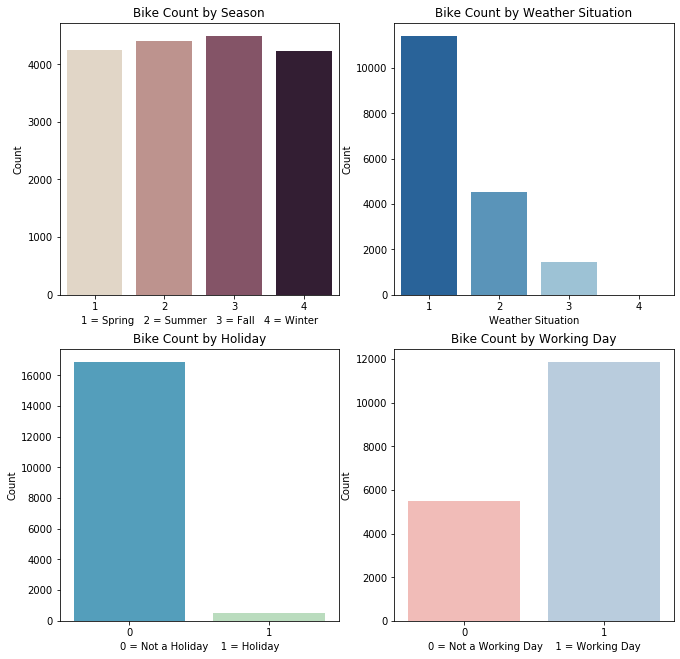

In [14]:
# distribution of categorical variables (season, weather, holiday, workingday)
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(11,11))
sn.countplot(x='season', data=bikedata,
           palette="ch:.25", ax=ax[0][0])
ax[0][0].set(title="Bike Count by Season")
ax[0][0].set(ylabel="Count")
ax[0][0].set(xlabel="1 = Spring   2 = Summer   3 = Fall   4 = Winter")

sn.countplot(x='weather', data=bikedata,
           palette= "Blues_r", ax=ax[0][1])
ax[0][1].set(title="Bike Count by Weather Situation")
ax[0][1].set(ylabel="Count")
ax[0][1].set(xlabel="Weather Situation")

sn.countplot(x='holiday', data=bikedata, 
           palette= "GnBu_r", ax=ax[1][0])
ax[1][0].set(title="Bike Count by Holiday")
ax[1][0].set(ylabel="Count")
ax[1][0].set(xlabel="0 = Not a Holiday    1 = Holiday")

sn.countplot(x='workingday', data=bikedata, 
           palette= "Pastel1",ax=ax[1][1])
ax[1][1].set(title="Bike Count by Working Day")
ax[1][1].set(ylabel="Count")
ax[1][1].set(xlabel="0 = Not a Working Day    1 = Working Day")

In [15]:
bikedata['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [16]:
bikedata['weather'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weather, dtype: int64

In [17]:
bikedata['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [18]:
bikedata['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

[Text(0.5, 0, 'Feels Like Temperature (atemp)')]

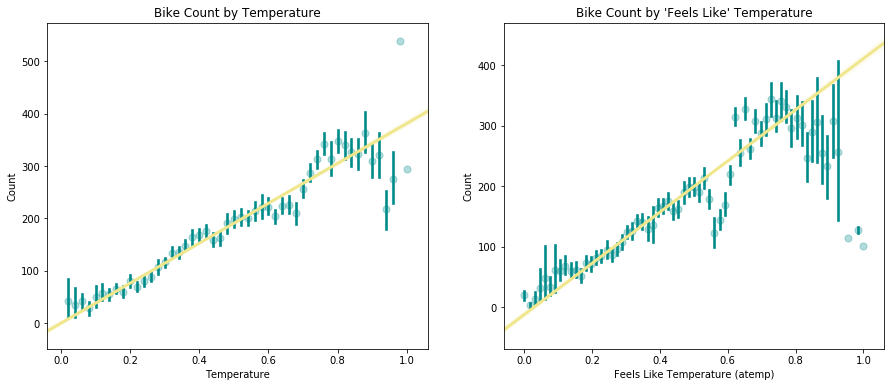

In [19]:
# visual linear regression of numerical variables (temp, atemp)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
sn.regplot(x="temp", y="count", x_estimator=np.mean, line_kws = {'color':'khaki', 'lw':3},
           scatter_kws = {'color':'darkcyan', 'alpha':0.3},
           data=bikedata, ax=ax1)
ax1.set(title="Bike Count by Temperature")
ax1.set(ylabel="Count")
ax1.set(xlabel="Temperature")


sn.regplot(x="atemp", y="count", x_estimator=np.mean, line_kws = {'color':'khaki', 'lw':3},
           scatter_kws = {'color':'darkcyan', 'alpha':0.3}, 
           data=bikedata, ax=ax2)
ax2.set(title="Bike Count by 'Feels Like' Temperature")
ax2.set(ylabel="Count")
ax2.set(xlabel="Feels Like Temperature (atemp)")

[Text(0.5, 0, 'Wind Speed (mph)')]

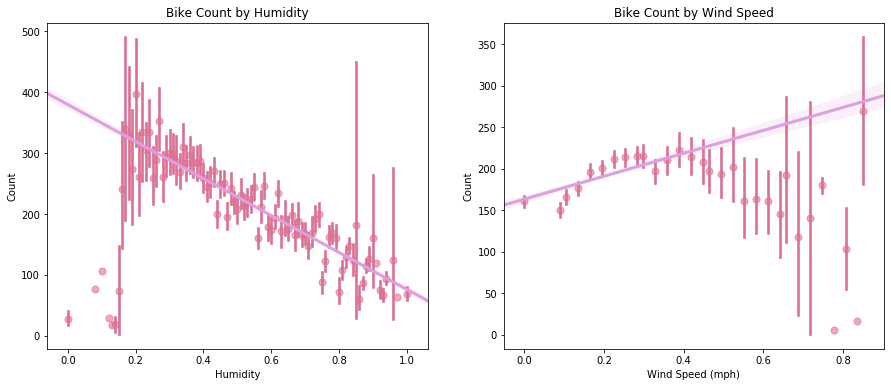

In [20]:
# visual linear regression of numerical variables (humidity, windspeed)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
sn.regplot(x="humidity", y="count", x_estimator=np.mean, line_kws = {'color':'plum', 'lw':3},
           scatter_kws = {'color':'palevioletred', 'alpha':0.6},
           data=bikedata, ax=ax1)
ax1.set(title="Bike Count by Humidity")
ax1.set(ylabel="Count")
ax1.set(xlabel="Humidity")


sn.regplot(x="windspeed", y="count", x_estimator=np.mean, line_kws = {'color':'plum', 'lw':3},
           scatter_kws = {'color':'palevioletred', 'alpha':0.6}, 
           data=bikedata, ax=ax2)
ax2.set(title="Bike Count by Wind Speed")
ax2.set(ylabel="Count")
ax2.set(xlabel="Wind Speed (mph)")

Text(0.5, 6.799999999999997, 'Hour')

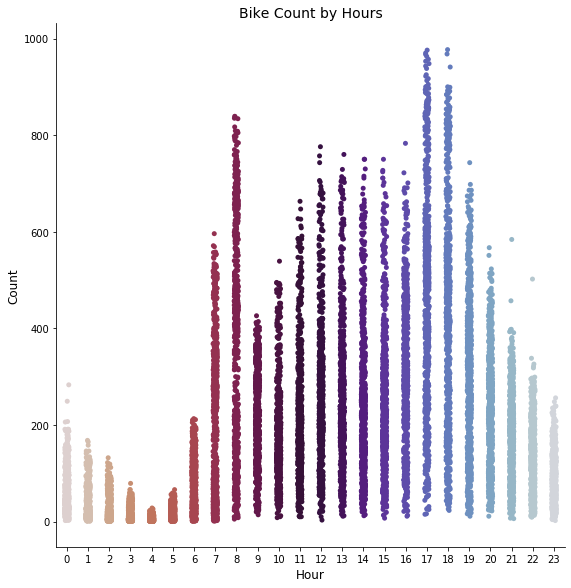

In [21]:
# box plot for hourly distribution of counts
sn.catplot(x="hour", y="count", data=bikedata,
          palette="twilight_r", height=8, aspect=9/9)
plt.title("Bike Count by Hours", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Hour", fontsize=12)

Text(-2.4499999999999957, 0.5, 'Count')

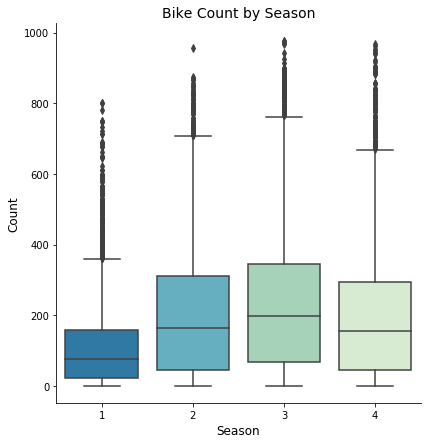

In [22]:
sn.catplot(x="season", y="count", kind="box", data=bikedata
          ,palette="GnBu_r", height=6, aspect=9/9)
plt.title("Bike Count by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Count", fontsize=12)

Text(-2.4499999999999957, 0.5, 'Count')

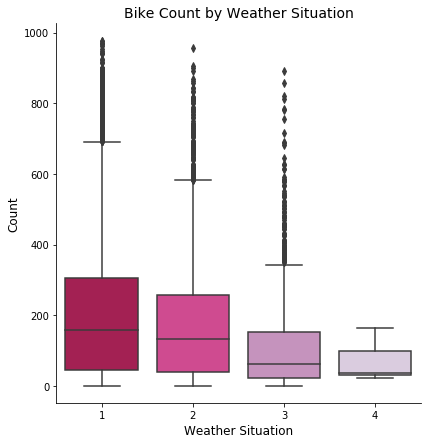

In [23]:
sn.catplot(x="weather", y="count", kind="box", data=bikedata
          ,palette="PuRd_r", height=6, aspect=9/9)
plt.title("Bike Count by Weather Situation", fontsize=14)
plt.xlabel("Weather Situation", fontsize=12)
plt.ylabel("Count", fontsize=12)

Text(-2.4499999999999957, 0.5, 'Count')

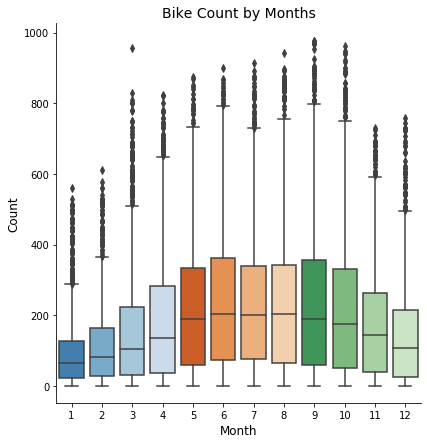

In [24]:
sn.catplot(x="month", y="count", kind="box", data=bikedata
          ,palette="tab20c", height=6, aspect=9/9)
plt.title("Bike Count by Months", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)

Text(0, 0.5, 'Count')

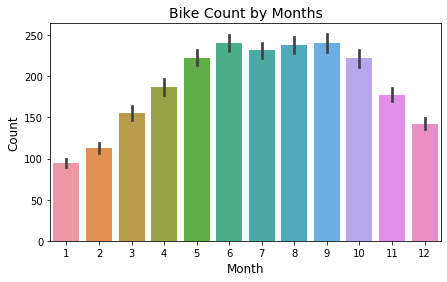

In [25]:
# relationship between count and month
fig, ax =plt.subplots(figsize=(7,4))
sn.barplot(data=bikedata, x="month", y="count")
plt.title("Bike Count by Months", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)

In [26]:
bikedata['month'].value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: month, dtype: int64

Text(0.5, 0, 'Hour')

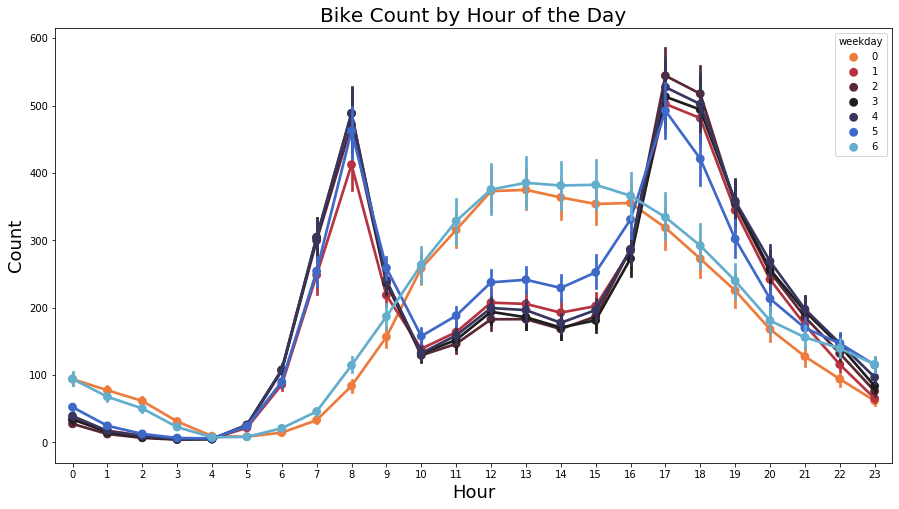

In [27]:
# hourly distribution on any day of the week
fig, ax = plt.subplots(figsize=(15,8))
sn.pointplot(x="hour", y="count",hue="weekday",
           data=bikedata, palette="icefire_r")
plt.title("Bike Count by Hour of the Day", fontsize=20)
plt.ylabel("Count", fontsize=18)
plt.xlabel("Hour", fontsize=18)

Text(0.5, 0, 'Hour')

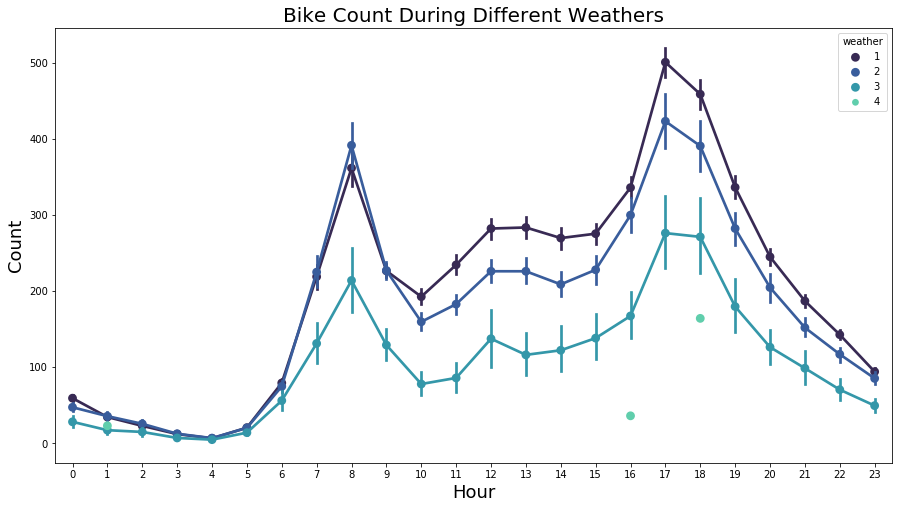

In [28]:
# bike count during 4 weather situations
fig, ax = plt.subplots(figsize=(15,8))
sn.pointplot(x="hour", y="count",hue="weather",
           data=bikedata, palette="mako")
plt.title("Bike Count During Different Weathers", fontsize=20)
plt.ylabel("Count", fontsize=18)
plt.xlabel("Hour", fontsize=18)

Text(0.5, 0, 'Hour')

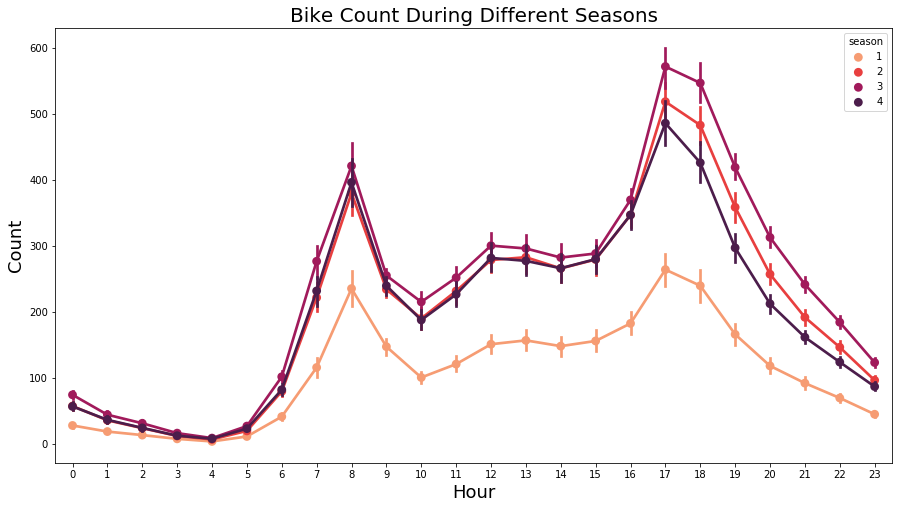

In [29]:
# 
fig, ax = plt.subplots(figsize=(15,8))
sn.pointplot(x="hour", y="count",hue="season",
           data=bikedata, palette="rocket_r")
plt.title("Bike Count During Different Seasons", fontsize=20)
plt.ylabel("Count", fontsize=18)
plt.xlabel("Hour", fontsize=18)

Text(0.5, 0, 'Hour')

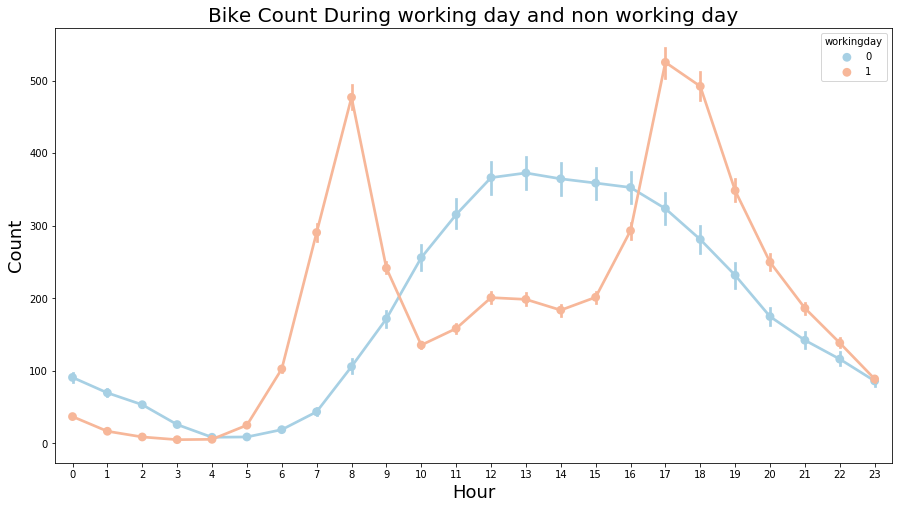

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
sn.pointplot(x="hour", y="count",hue="workingday",
           data=bikedata, palette="RdBu_r")
plt.title("Bike Count During working day and non working day", fontsize=20)
plt.ylabel("Count", fontsize=18)
plt.xlabel("Hour", fontsize=18)

Text(0.5, 0, 'Season')

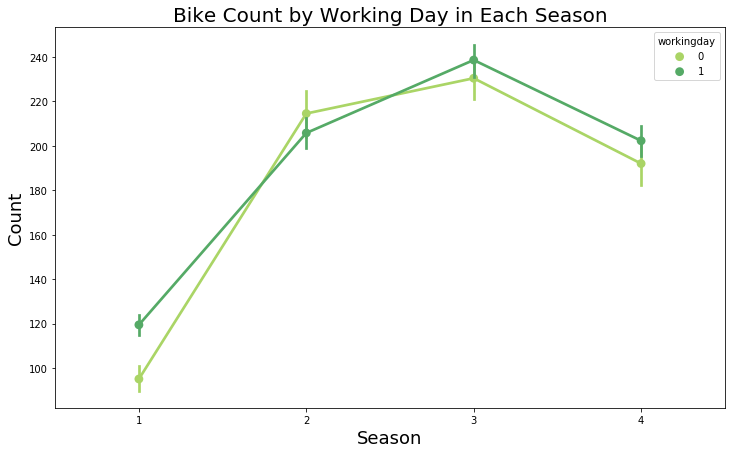

In [31]:
# working day vs holiday distribution + season
fig, ax = plt.subplots(figsize=(12,7))
sn.pointplot(x="season", y="count",hue="workingday",
           data=bikedata, palette="summer_r")
plt.title("Bike Count by Working Day in Each Season", fontsize=20)
plt.ylabel("Count", fontsize=18)
plt.xlabel("Season", fontsize=18)

[Text(0.5, 0, 'Weekday')]

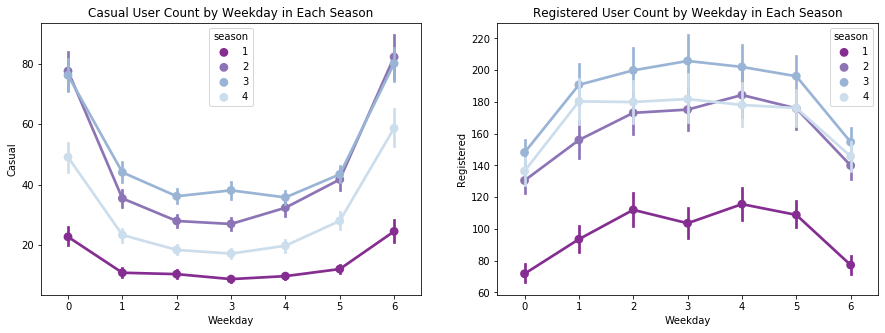

In [32]:
# types of user count during weekday in each season
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
sn.pointplot(x="weekday", y="casual",hue="season",
           data=bikedata, palette="BuPu_r", ax=ax1)
ax1.set(title="Casual User Count by Weekday in Each Season")
ax1.set(ylabel="Casual")
ax1.set(xlabel="Weekday")

sn.pointplot(x="weekday", y="registered",hue="season",
           data=bikedata, palette="BuPu_r", ax=ax2)
ax2.set(title="Registered User Count by Weekday in Each Season")
ax2.set(ylabel="Registered")
ax2.set(xlabel="Weekday")

From the exploratory analysis, the hypotheses to analyze the factors contributing to bike demand and the relationship between input variables and target variable are as follows:

● Null Hypothesis H0: There is no association between any input variables and target variable, meaning that there is no relationship between bike rental counts and observed factors

● H1: Bike rental counts increase when the weather is nice

● H2: Bike rental counts are higher when it is not a holiday

● H3: Bike rental counts are higher on working days

● H4: Bike rental counts increases as the temperature increases

● H5: Bike rental counts are affected by humidity, as humidity increases bike counts
decrease

● H6: Bike rental counts vary depending on seasons

● H7: Hours of the day play the significant role in influencing bike rental counts

● H8: Bike rental counts are higher during weekdays and lower on weekend

● H9: There is some association between month variable and bike rental counts, that is
in the middle of the year June, July and August contribute to higher bike rental demand.

Next, we will test if data sets come from populations with a common distribution by using histogram distribution and Quantile-Quantile plot.

[Text(0.5, 1.0, 'Theoritical Quantiles (Q-Q plot)')]

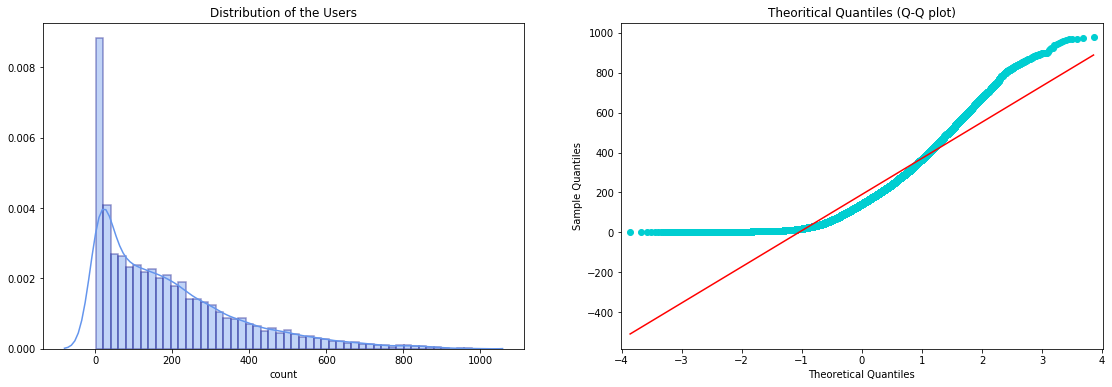

In [33]:
# check distribution of data using histogram and QQplot
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(19,6))
sn.distplot(bikedata['count'], color = "cornflowerblue"
            , hist_kws=dict(edgecolor="navy", linewidth=1.5), ax=ax1)
ax1.set(title="Distribution of the Users")
qqplot(bikedata['count'], color="darkturquoise", ax=ax2, line="s")
ax2.set(title="Theoritical Quantiles (Q-Q plot)")

From the visualisation, there is significant difference in the value of count (0-1000), it is right skewed distribution (positive skewed) meaning that there could be outliers but they are also important to create model and thus cannot be filtered out. Therefore, some data need to be normalised. In terms of QQ plot, we can see that most values are 0 and the points are not forming straight line due to huge number of quantities. We need to transform the distribution so the line is conforming with red diagonal line.

Log transformation will be used as it helps reducing skewness in the data.

In [34]:
bikedata['count'] = np.log(bikedata['count'])

[Text(0.5, 1.0, 'Theoritical Quantiles (Q-Q plot)')]

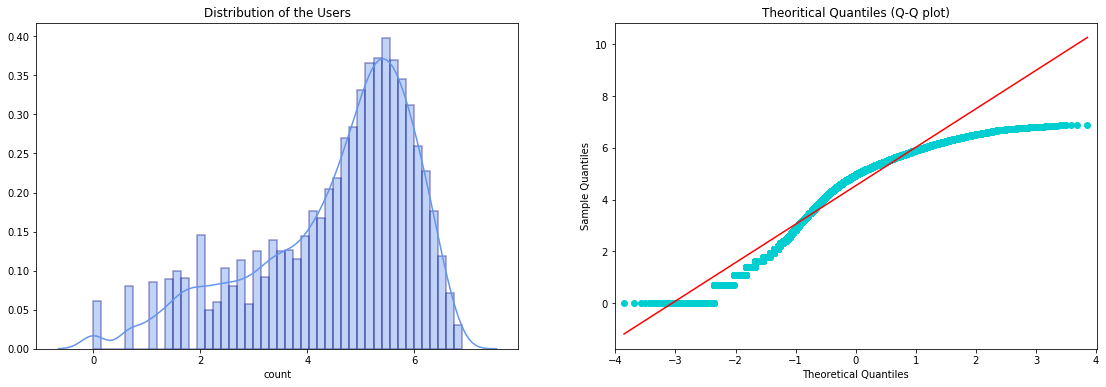

In [35]:
# check distribution of data using histogram and QQplot
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(19,6))
sn.distplot(bikedata['count'], color = "cornflowerblue"
            , hist_kws=dict(edgecolor="navy", linewidth=1.5), ax=ax1)
ax1.set(title="Distribution of the Users")
qqplot(bikedata['count'], color="darkturquoise", ax=ax2, line="s")
ax2.set(title="Theoritical Quantiles (Q-Q plot)")

Now we can observe a bell curve in the histrogram distribution. With the QQ plot, after log transformation it is not as much deviating as the first one and some values are now aligning with the red line.

### Correlation Matrix

(7.0, 0.0)

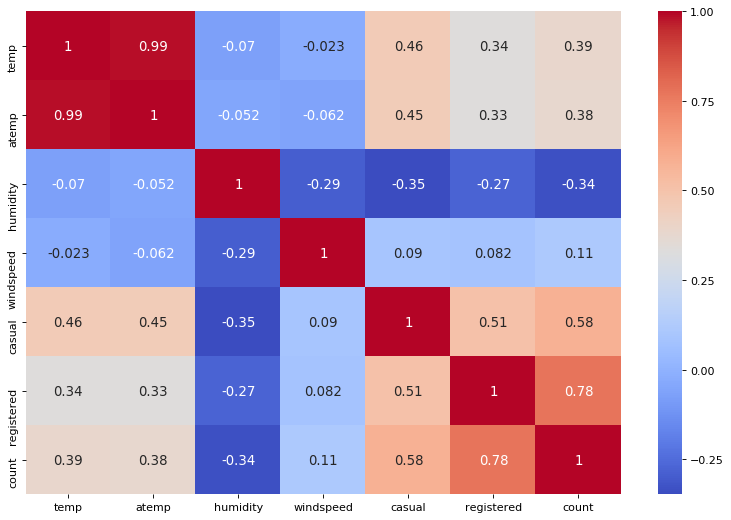

In [36]:
# correlation between numerical values
CorrMat = bikedata.corr()
plt.figure(figsize=(12,8), dpi = 80)
ax = sn.heatmap(CorrMat, annot=True, annot_kws={'size':12}, cmap='coolwarm')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Correlation Matrix will only show numerical attributes (because we have converted some attributes to categorical data so now all attributes are shown here.

The correlation matrix shows that temp and atemp variables have a high correlation of 0.99 meaning that they present the same pattern, for example, if temperature increases - atemp (feel-like temperature will also increase) and thus we can remove one variable. 'atemp' will be removed.

Another variables that could be dropped is 'windspeed'because the value does not show significance (only 0.093) unlike other attributes that are higher in value meaning that they have influence on target variable 'count'

Whereas negative values such as humidity and count, they show a value of -0.34 meaning that if one variable increases the other will go opposite way which is decrease.

Casual and registered user variables are also in high correlation with target variable 'count' because two user types add up to the actual 'count'

Therefore, the attributes 'atemp', 'windspeed', 'casual' and 'registered' will be removed before modeling.

### One Hot Encoding
One hot encoding will be used to convert categorical variables into binary categories.
Only season attribute will be one-hot encoded since adding extra attributes will increase the dimension of dataset too much.

In [37]:
ca_cols = ['season']
bikedata = pd.get_dummies(bikedata, columns=ca_cols)

In [38]:
bikedata.head()

,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,2.772589,1,0,0,0
1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,3.688879,1,0,0,0
2,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,3.465736,1,0,0,0
3,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,2.564949,1,0,0,0
4,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,0.000000,1,0,0,0


### Split input data
First, attributes that were selected from correlation matrix will be dropped which are 'atemp','windspeed','casual' and 'registered'

'count' will also be dropped from x (independent variable) as we do not want redundancy since 'count' is a dependent variable.

In [39]:
# x = independent variables , y = dependent variables (count)
x = bikedata.drop(columns=['atemp','windspeed','casual','registered',
                           'count'], axis=1)
y = bikedata['count']

In [40]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


## Modeling

### Poisson Regression

In [41]:
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mask = np.random.rand(len(bikedata)) < 0.7
df_train = bikedata[mask]
df_test = bikedata[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=12221
Testing data set length=5158


In [42]:
expr = """count ~ month + hour + holiday + weekday + workingday + weather + temp + humidity +
season_1 + season_2 + season_3 + season_4"""

In [43]:
y_train, x_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, x_test = dmatrices(expr, df_test, return_type='dataframe')

In [44]:
poisson_training_results = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                12221
Model:                            GLM   Df Residuals:                    12171
Model Family:                 Poisson   Df Model:                           49
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21133.
Date:                Mon, 07 Jun 2021   Deviance:                       1939.8
Time:                        23:40:49   Pearson chi2:                 1.69e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9328      0.033     

Significant attributes that p < 0.05 are hour, temp, humidity and seasons.

In [45]:
expr1 = """count ~ hour + temp + humidity +
season_1 + season_2 + season_3 + season_4"""

In [46]:
y_train, x_train = dmatrices(expr1, df_train, return_type='dataframe')
y_test, x_test = dmatrices(expr1, df_test, return_type='dataframe')

poisson_training_results1 = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()
print(poisson_training_results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                12221
Model:                            GLM   Df Residuals:                    12192
Model Family:                 Poisson   Df Model:                           28
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21180.
Date:                Mon, 07 Jun 2021   Deviance:                       2034.4
Time:                        23:40:50   Pearson chi2:                 1.77e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9714      0.028     35.095      0.0

In [47]:
y_predicted_poi = poisson_training_results1.predict(x_test)

In [48]:
mse = mean_squared_error(y_test, y_predicted_poi)
r = r2_score(y_test, y_predicted_poi)
mae = mean_absolute_error(y_test, y_predicted_poi)

print("Mean Squared Error:", mse)
print("R score:",r)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.500278515091911
R score: 0.7718240155829903
Mean Absolute Error: 0.5369543303055853


Text(0.5, 1.0, 'Poisson Regression Model')

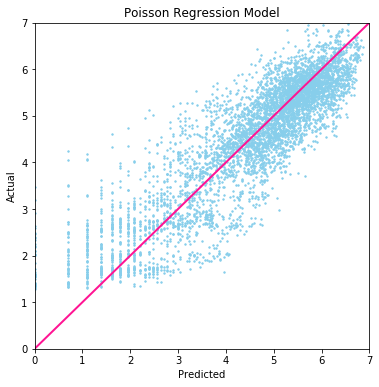

In [49]:
# plot prediction vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_predicted_poi, color='skyblue',s=2)
plt.plot( [0,1000],[0,1000], color='deeppink', linewidth=2)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Poisson Regression Model')

#### Divide data into train and test

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=10)

### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

linearRegressor = LinearRegression()
linear_model = linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)

In [52]:
print("Train accuracy:", linearRegressor.score(x_train, y_train))

Train accuracy: 0.46328537989425034


In [53]:
print("Test accuracy:", linearRegressor.score(x_test, y_test))

Test accuracy: 0.4716186130482284


In [54]:
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
print("Mean Squared Error:", mse)
print("R score:",r)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.208621152417836
R score: 0.4716186130482284
Mean Absolute Error: 0.8618780365479082


Text(0.5, 1.0, 'Linear Regression Model')

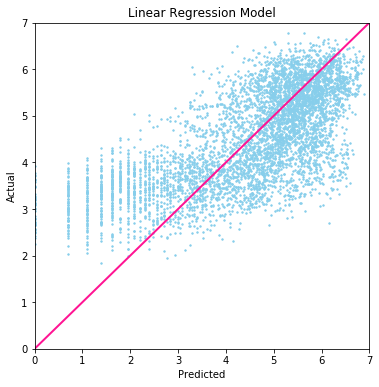

In [55]:
# plot prediction vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_predicted, color='skyblue',s=2)
plt.plot( [0,1000],[0,1000], color='deeppink', linewidth=2)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Regression Model')

In [56]:
# coefficient
linear_model.coef_

array([ 4.99642037e-04,  9.81145150e-02, -2.23481486e-01,  1.33213474e-02,
       -6.54886133e-02, -7.99397230e-03,  2.66737921e+00, -1.52065737e+00,
       -1.49300065e-01,  4.14454457e-03, -2.03254902e-01,  3.48410422e-01])

In [57]:
coeff = pd.DataFrame(linearRegressor.coef_, x_train.columns, columns=['Coefficient'])
coeff
coeff.sort_values(by='Coefficient')

,Coefficient
humidity,-1.520657
holiday,-0.223481
season_3,-0.203255
season_1,-0.149300
workingday,-0.065489
weather,-0.007994
month,0.000500
season_2,0.004145
weekday,0.013321
hour,0.098115


In [58]:
# test using RMSLE
from sklearn.metrics import mean_squared_log_error
def RMSLE(predictions, realizations):
    predictions_use = predictions.clip(0)
    rmsle = np.sqrt(np.mean(np.array(np.log(predictions_use + 1)
                                     - np.log(realizations + 1))**2))
    return rmsle

RMSLE(y_predicted, y_test)

# Lower values of RMSLE indicate better fit

0.27825781841001895

### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor(min_samples_split=25, random_state = 10)
decisiontree_model = decisiontree.fit(x_train, y_train)
y_predicted_d = decisiontree.predict(x_test)

In [60]:
print("Train accuracy:", decisiontree.score(x_train, y_train))

Train accuracy: 0.940240111532349


In [61]:
print("Test accuracy:", decisiontree.score(x_test, y_test))

Test accuracy: 0.8955321870098975


In [62]:
mse = mean_squared_error(y_test, y_predicted_d)
r = r2_score(y_test, y_predicted_d)
mae = mean_absolute_error(y_test, y_predicted_d)
rmsle = RMSLE(y_predicted_d, y_test)
print("Mean Squared Error:", mse)
print("R score:", r)
print("Mean Absolute Error:", mae)
print("RMSLE:", rmsle)

Mean Squared Error: 0.23895998542846736
R score: 0.8955321870098975
Mean Absolute Error: 0.3554922754090083
RMSLE: 0.14412461140404997


Next decision tree's predictions and actuals will be plotted to see the conformity.

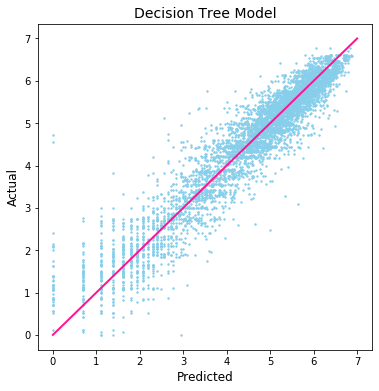

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predicted_d, color="skyblue", s=2)
plt.plot(range(8), range(8), color='deeppink', linewidth=2)
plt.title('Decision Tree Model', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [64]:
feat_importances = pd.DataFrame(decisiontree_model.feature_importances_, index=x_train.columns)
feat_importances

,0
month,0.008555
hour,0.785189
holiday,0.002006
weekday,0.010894
workingday,0.056827
weather,0.018529
temp,0.080350
humidity,0.012193
season_1,0.016619
season_2,0.000191


In [65]:
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
import pydot
from io import StringIO

# visualize
dotfile = StringIO()
export_graphviz(decisiontree, out_file=dotfile, feature_names=x.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz.png") 
# saved in the following file called 'dt_viz'

In [66]:
#retrain with a small max_depth limit

decisiontree_small = DecisionTreeRegressor(max_depth = 3, random_state=10)
decisiontree_small.fit(x_train, y_train)

print("Train accuracy:", decisiontree_small.score(x_train, y_train))
print("Test accuracy:", decisiontree_small.score(x_test, y_test))

y_predicted_d1 = decisiontree_small.predict(x_test)

mse = mean_squared_error(y_test, y_predicted_d1)
r = r2_score(y_test, y_predicted_d1)
mae = mean_absolute_error(y_test, y_predicted_d1)
print("Mean Squared Error:", mse)
print("R score:", r)
print("Mean Absolute Error:", mae)


Train accuracy: 0.7159579215085914
Test accuracy: 0.7085253880897711
Mean Squared Error: 0.6667198921971815
R score: 0.7085253880897711
Mean Absolute Error: 0.6164082134501965


It can be noted that the simpler model (smaller max_depth) actually performs poorly on both train and test dataset. MSE and MAE are much higher while R score is also much lower. Train and test accuracy is low. So the original decision tree model will be opted for next step.

In [67]:
n_nodes = decisiontree.tree_.node_count
children_left = decisiontree.tree_.children_left
children_right = decisiontree.tree_.children_right
feature = decisiontree.tree_.feature
threshold = decisiontree.tree_.threshold
n_nodes

2007

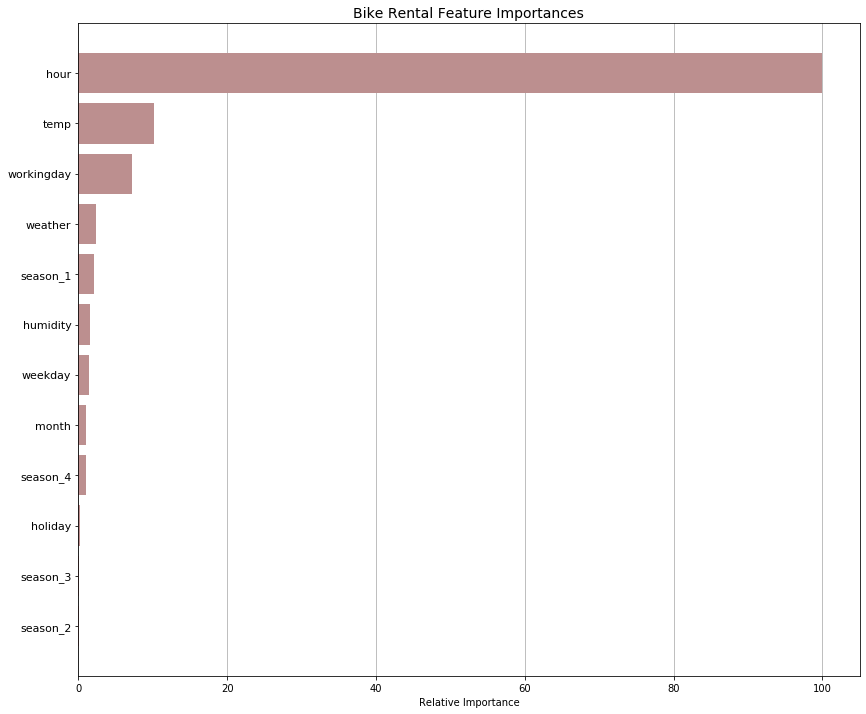

In [68]:
# plot feature importances
importances = decisiontree.feature_importances_
importances = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(importances)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(14,12))
plt.title('Bike Rental Feature Importances', fontsize=14)
plt.barh(pos, importances[sorted_idx], color='rosybrown', align='center')
plt.yticks(pos, x_train.columns[sorted_idx], fontsize=11)
plt.xlabel('Relative Importance')
plt.grid(axis = 'x')
ax = plt.axes()
ax.set_axisbelow(True)
plt.show()

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(n_estimators = 250, max_features = 'auto')
randomforest_model = randomforest.fit(x_train, y_train)
y_predicted_r = randomforest.predict(x_test)

In [70]:
print("Train accuracy:", randomforest.score(x_train, y_train))

Train accuracy: 0.98896197296322


In [71]:
print("Test accuracy:", randomforest.score(x_test, y_test))

Test accuracy: 0.9175129419013621


In [72]:
mse = mean_squared_error(y_test, y_predicted_r)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test, y_predicted_r)
rmsle = RMSLE(y_predicted_r, y_test)
print("Mean Squared Error:", mse)
print("R score:", r)
print("Mean Absolute Error:", mae)
print("RMSLE:", rmsle)

Mean Squared Error: 0.18868114146464515
R score: 0.9175129419013621
Mean Absolute Error: 0.31553438435802594
RMSLE: 0.13408594136220822


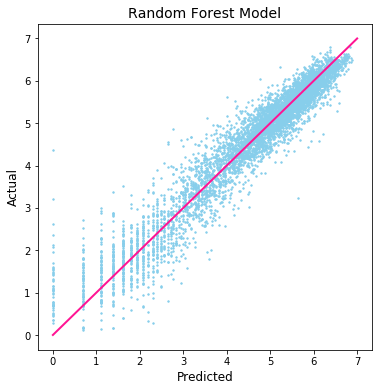

In [73]:
# compare predicted values with true values in testing set
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predicted_r, color="skyblue", s=2)
plt.plot(range(8), range(8), color='deeppink', linewidth=2)
plt.title('Random Forest Model', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [74]:
# k-fold cross validation to evaluate the performance of the model
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = randomforest, X = x_train, y = y_train, cv =10)
accuracy.mean()

0.9194254170533925

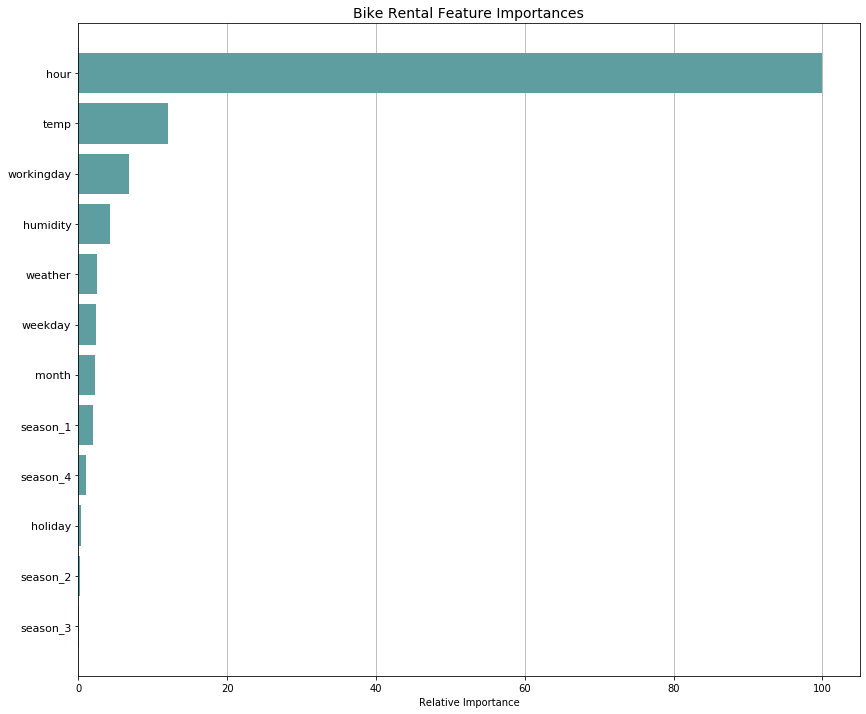

In [75]:
# plot feature importances from random forest
importances = randomforest.feature_importances_
importances = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(importances)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(14,12))
plt.title('Bike Rental Feature Importances', fontsize=14)
plt.barh(pos, importances[sorted_idx], color='cadetblue', align='center')
plt.yticks(pos, x_train.columns[sorted_idx], fontsize=11)
plt.xlabel('Relative Importance')
plt.grid(axis = 'x')
ax = plt.axes()
ax.set_axisbelow(True)
plt.show()

### AdaBoost

In [76]:
from sklearn.ensemble import AdaBoostRegressor


ar = AdaBoostRegressor(base_estimator=randomforest,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [77]:
adaboost = AdaBoostRegressor(base_estimator=randomforest, n_estimators=c['n_estimators'], random_state=0)
ada_model = adaboost.fit(x_train, y_train)
y_predicted_ada = adaboost.predict(x_test)

In [78]:
print("Train accuracy:", adaboost.score(x_train, y_train))

Train accuracy: 0.9890360742006108


In [79]:
print("Test accuracy:", adaboost.score(x_test, y_test))

Test accuracy: 0.9207644913613698


In [80]:
mse = mean_squared_error(y_test, y_predicted_ada)
r = r2_score(y_test, y_predicted_ada)
mae = mean_absolute_error(y_test, y_predicted_ada)
rmsle = RMSLE(y_predicted_ada, y_test)
print("Mean Squared Error:", mse)
print("R score:", r)
print("Mean Absolute Error:", mae)
print("RMSLE:", rmsle)

Mean Squared Error: 0.18124353758126557
R score: 0.9207644913613698
Mean Absolute Error: 0.31352283691243976
RMSLE: 0.13192713021095084


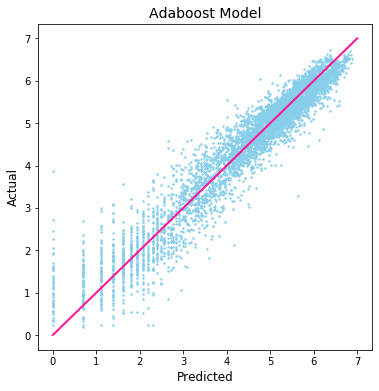

In [81]:
# compare predicted values with true values in testing set
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predicted_ada, color="skyblue", s=2)
plt.plot(range(8), range(8), color='deeppink', linewidth=2)
plt.title('Adaboost Model', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

### Model Performance
From five machine learning algorithms, AdaBoost or Adaptive Boosting is the most appropriate model that predicts the best result. Mean Absolute Error (MAE) indicates magnitude of difference between the forecasted value and actual value of the observation. It tells us how big of an error we can expect from the forecast on average. In this case, evaluation metrics demonstrate that adaboost has the lowest MAE of 0.31 and 0.32 for random forests, 0.36 for decision trees, 0.54 for poisson regression and 0.86 for linear regression. Mean Squared Error (MSE) measures how close the fitted line is to data points meaning that the smaller the value, the closer we are to finding the line of best fit. Adaboost also has the lowest MSE of 0.18. However, R Score and RMSLE indicate the equivalent values for Random Forest and AdaBoost. Random forest performs almost as accurately as adaboost.

### Feature Importance
Feature importance analysis will be performed to determine what variables are important, relevant and contribute to our target variable by plotting upon the adaboost model.

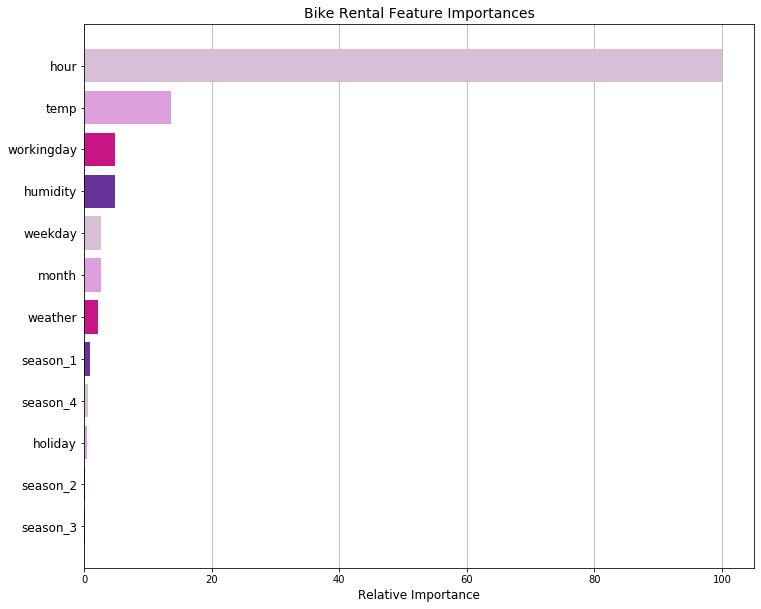

In [82]:
# plot feature importances from AdaBoost
importances = adaboost.feature_importances_
importances = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(importances)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.title('Bike Rental Feature Importances', fontsize=14)
plt.barh(pos, importances[sorted_idx], color=['rebeccapurple', 'mediumvioletred', 'plum', 'thistle'], align='center')
plt.yticks(pos, x_train.columns[sorted_idx], fontsize=12)
plt.xlabel('Relative Importance', fontsize = 12)
plt.grid(axis = 'x')
ax = plt.axes()
ax.set_axisbelow(True)
plt.show()

The above figure shows the features ranked according to the most significant attributes that contribute to the prediction. The output illustrates that hour in a day play the most important role in influencing bike rental counts, followed by temperature, whether it is a working day or not and humidity and so on. Seasons seemed to have a lower effect meaning they contributed less to our target variable count. Nevertheless, comparison only among season variables suggests that season 1 which is Spring is the most significant among four seasons which conforms to our exploratory data analysis that the number of counts was significantly low in Spring.


### Hypothese Testing - Statistical Significances
Hypothesis testing uses a test statistic to examine statistical significance of variables, this study used a significance threshold of 0.05 meaning that if the probability calculated by statistical formula results in a statistical value less than 0.05 (p < 0.05), then there is no sufficient information to accept the null hypothesis. In other words, there are some associations between the target variable ‘count’ and input factors, in which each attribute would also be tested for significance to determine the relevance to the response variable. Therefore, some of the hypotheses H1-H8 will be accepted.

This study will use the Analysis of Variance (ANOVA) statistical test with SelectKBest and f_classif module. The k value will be to 5 meaning that only the five best features according to p values would be shown. A threshold for p < 0.05 will also set so that anything less than 0.05 would be shown, meaning that these attributes were significant. Higher p-value variables were also filtered to see what ones are not significant.

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
k_best = SelectKBest(f_classif, k=5)

In [84]:
k_best.fit_transform(x,y)

array([[0, 0.24, 0.81, 1, 0],
       [1, 0.22, 0.8, 1, 0],
       [2, 0.22, 0.8, 1, 0],
       ...,
       [21, 0.26, 0.6, 1, 0],
       [22, 0.26, 0.56, 1, 0],
       [23, 0.26, 0.65, 1, 0]], dtype=object)

In [85]:
k_best.pvalues_

array([1.27877199e-012, 0.00000000e+000, 9.99999999e-001, 6.97748467e-001,
       1.21606269e-013, 3.31319493e-004, 0.00000000e+000, 1.02235132e-257,
       7.54763034e-112, 3.06463366e-004, 2.86511174e-047, 5.07022842e-005])

In [86]:
p_values = pd.DataFrame({'column': x.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')
p_values.head()

,column,p_value
1,hour,0.000000e+00
6,temp,0.000000e+00
7,humidity,1.022351e-257
8,season_1,7.547630e-112
10,season_3,2.865112e-47


In [87]:
p_values[p_values['p_value'] < .05]

,column,p_value
1,hour,0.000000e+00
6,temp,0.000000e+00
7,humidity,1.022351e-257
8,season_1,7.547630e-112
10,season_3,2.865112e-47
4,workingday,1.216063e-13
0,month,1.278772e-12
11,season_4,5.070228e-05
9,season_2,3.064634e-04
5,weather,3.313195e-04


The above figure demonstrates significant columns whose p value is less than 0.05. This means that we can reject the null hypothesis that says ‘there is no association between any input variables and target variable, meaning that there is no relationship between bike rental counts and observed factors’ and accept the following:

● H1: Bike rental counts increase when the weather is nice
From figure 17, we can see that ‘weather 1’ generally contributed to the highest number of bike rentals except for that ‘weather 2’ slightly outperformed in the morning. On the other hand, bike rentals during ‘weather 4’ happened on rare occasions in which a few dots can be seen.


● H3: Bike rental counts are higher on working days
As can be seen in figure 18, ‘workingday 1’ referring to a working day experienced a greater number of bike rentals in general. However, on ‘workingday 0’ or non- working day, the counts were higher in the afternoon which could mean that people ride a bike for fun or as a recreational activity on their days off. Whereas the lower number of bike rentals in the afternoon on working day made sense as employees could be at their workplace and college students could be at the campus.

● H4: Bike rental counts increases as the temperature increases

● H5: Bike rental counts are affected by humidity, as humidity increases bike counts
decrease

● H6: Bike rental counts vary depending on seasons
Figure... shows that ‘season 1’ - spring had the lowest number of bike rentals whereas ‘season 3’ - fall was the most popular season for bike rentals.

● H7: Hours of the day play the significant role in influencing bike rental counts Once again, figure 19 also demonstrated the highest bike rentals at peak commuting hour at 8am and 5-6pm.

● H9: There is some association between month variable and bike rental counts, that is in the middle of the year June, July and August contribute to higher bike rental demand.

In [88]:
p_values[p_values['p_value'] >= .05]

,column,p_value
3,weekday,0.697748
2,holiday,1.000000


The majority of the attributes have a low p-value, nevertheless two of them have quite a high p value meaning that they are not statistically significant. The two variables are ‘weekday’ with a p value of 0.698 and ‘holiday’ with a p value of 1.0, which means that there is not sufficient data to accept H2: Bike rental counts are higher when it is not a holiday and H8: Bike rental counts are higher during weekdays and lower on weekend to be true.